In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Display all columns and 500 rows
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,250000


In [4]:
#Check the shape of the dataset
df.shape

(1460, 81)

# Missing value treatment

In [5]:
#Check null values in each columns 
df['LotFrontage'].count()

1201

In [6]:
#Check percentage of null values in each column
#for i in df.columns:
    #print(i, round(df[i].isnull().sum()/len(df[i])*100,2))
null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data

,column_name,missing_percentage
Id,Id,0.00
MSSubClass,MSSubClass,0.00
MSZoning,MSZoning,0.00
LotFrontage,LotFrontage,17.74
LotArea,LotArea,0.00
Street,Street,0.00
Alley,Alley,93.77
LotShape,LotShape,0.00
LandContour,LandContour,0.00
Utilities,Utilities,0.00


In [7]:
#After visual inspection of the comuns that have more than 90% null (NA) values, we found that they are actually not null values,
#NA in this context have some meaning, so we are not dropping these columns, but instead replacing the 'NA' with more meaningful
#value, these columns with current NA values and new values are as below:
# Alley---> NA --->NoAlley
# PoolQC --->NA ---> NoPool
# Fence ---> NA --->NoFence
# MiscFeature --->NA ---> NoMisc
# FireplaceQu ---> NA ---> NoFirePlace
# GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType ---> NA ---> NoGarage
# BsmtFinType2, BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond ---> NA ---> NoBsmt


df['Alley'].fillna('NoAlley',inplace = True)
df['PoolQC'].fillna('NoPool',inplace = True)
df['Fence'].fillna('NoFence',inplace = True)
df['MiscFeature'].fillna('NoMisc',inplace = True)
df['FireplaceQu'].fillna('NoFirePlace',inplace = True)
df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna('NoGarage',inplace = True)
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)

In [8]:
#After this replacement let's check the missing percetage
null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data.sort_values(by='missing_percentage',ascending=False)

,column_name,missing_percentage
LotFrontage,LotFrontage,17.74
MasVnrType,MasVnrType,0.55
MasVnrArea,MasVnrArea,0.55
Electrical,Electrical,0.07
KitchenQual,KitchenQual,0.00
GarageYrBlt,GarageYrBlt,0.00
GarageType,GarageType,0.00
FireplaceQu,FireplaceQu,0.00
Fireplaces,Fireplaces,0.00
Functional,Functional,0.00


In [9]:
#Find the number of rows which has MasVnrType, MasVnrArea or Electrical as null
df[df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull()]

#It seems like we have only 9 such rows which is 0.6% of the total data, so let's drop these rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NoPool,NoFence,NoMisc,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NoPool,NoFence,NoMisc,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NoPool,NoFence,NoMisc,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal,237000
1379,1380,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,167500


In [10]:
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull())]

In [12]:
df.shape

(1451, 81)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


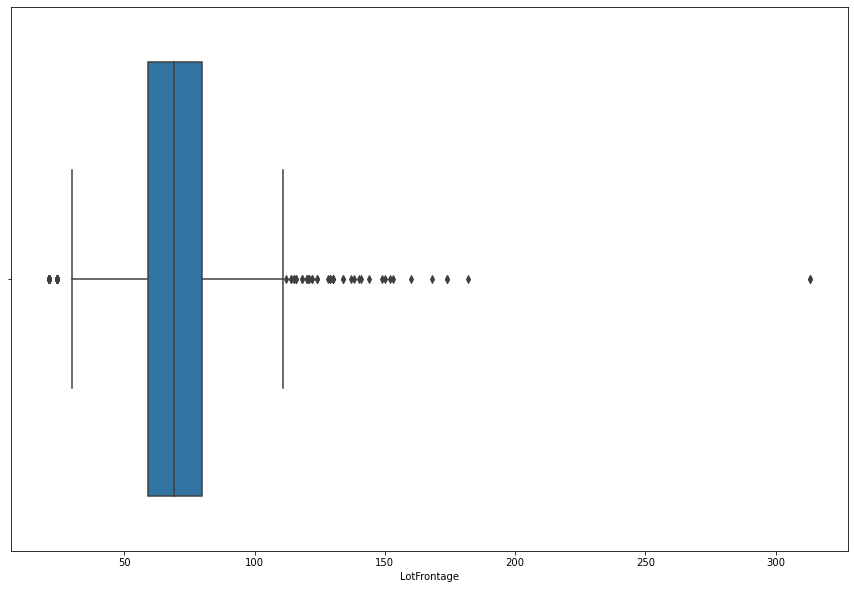

In [13]:
#Now we have all the columns with non null values except LotFrontage, let's see what we can do with this column
#Analyze the LotFrontage column
df['LotFrontage'].describe()
plt.figure(figsize=(15,10))
sns.boxplot(df.LotFrontage)
plt.show()

#As we can see that there are some outliers in this variable, so let's replace the missing values in this field with the median
#value

In [17]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)

In [18]:
df['LotFrontage'].isnull().sum()
#So, now we dont have any missing values in the data

0